In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('train-v2.0.csv')

In [8]:
df.head()

,id,context,question,answer_text,answer_start,is_impossible
0,56be85543aeaaa14008c9063,beyonc giselle knowlescarter bijnse beeyonsay ...,beyonce start becoming popular,in the late 1990s,269,False
1,56be85543aeaaa14008c9065,beyonc giselle knowlescarter bijnse beeyonsay ...,area beyonce compete growing,singing and dancing,207,False
2,56be85543aeaaa14008c9066,beyonc giselle knowlescarter bijnse beeyonsay ...,beyonce leave destiny child become solo singer,2003,526,False
3,56bf6b0f3aeaaa14008c9601,beyonc giselle knowlescarter bijnse beeyonsay ...,city state beyonce grow,"Houston, Texas",166,False
4,56bf6b0f3aeaaa14008c9602,beyonc giselle knowlescarter bijnse beeyonsay ...,decade beyonce become famous,late 1990s,276,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130319 entries, 0 to 130318
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             130319 non-null  object
 1   context        130319 non-null  object
 2   question       130310 non-null  object
 3   answer_text    86818 non-null   object
 4   answer_start   130319 non-null  int64 
 5   is_impossible  130319 non-null  bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 5.1+ MB


In [7]:
df.describe()

,answer_start
count,130319.000000
mean,212.727384
std,264.883218
min,-1.000000
25%,-1.000000
50%,110.000000
75%,357.000000
max,3126.000000


In [9]:
# unanswerable question 
df.isnull().sum()

id                   0
context              0
question             9
answer_text      43501
answer_start         0
is_impossible        0
dtype: int64

In [11]:
# question not matched
nums_impossible_question = df["is_impossible"].sum()
nums_impossible_question

43498

In [17]:
mismatches = df[(df["answer_text"].isnull() ) & (df['is_impossible'] == False)]
mismatches

,id,context,question,answer_text,answer_start,is_impossible
39848,570c6186b3d812140066d1b9,john personal life greatly affected reign cont...,many john known illegitimate child born remarried,NaN,568,False
91386,5728c3cf2ca10214002da73d,june german army marched paris declared open c...,many child came back auschwitz,NaN,373,False
107679,572f08f703f9891900756b50,one example omnidirectional antenna common ver...,meant area signal accepted well along conductor,NaN,628,False


## check the original text

- copy

```
{"question": "How many of John's known illegitimate children were born after he remarried?", "id": "570c6186b3d812140066d1b9", "answers": [{"text": "None", "answer_start": 568}], "is_impossible": false}]
{"question": "How many children came back from Auschwitz?", "id": "5728c3cf2ca10214002da73d", "answers": [{"text": "None", "answer_start": 373}], "is_impossible": false}
{"text": "horizontally", "answer_start": 384}], "is_impossible": false}, {"question": "What is meant by the area where signals cannot be accepted well along the conductor?", "id": "572f08f703f9891900756b50", "answers": [{"text": "null", "answer_start": 628}], "is_impossible": false}
```

In [25]:
df.iloc[39848]

id                                        570c6186b3d812140066d1b9
context          john personal life greatly affected reign cont...
question         many john known illegitimate child born remarried
answer_text                                                    NaN
answer_start                                                   568
is_impossible                                                False
Name: 39848, dtype: object

In [26]:
df.iloc[39848, 3] = "None"
df.iloc[91386, 3] = "None"
df.iloc[107679, 3] = "null"

c:\Users\15710\Anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\15710\Anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


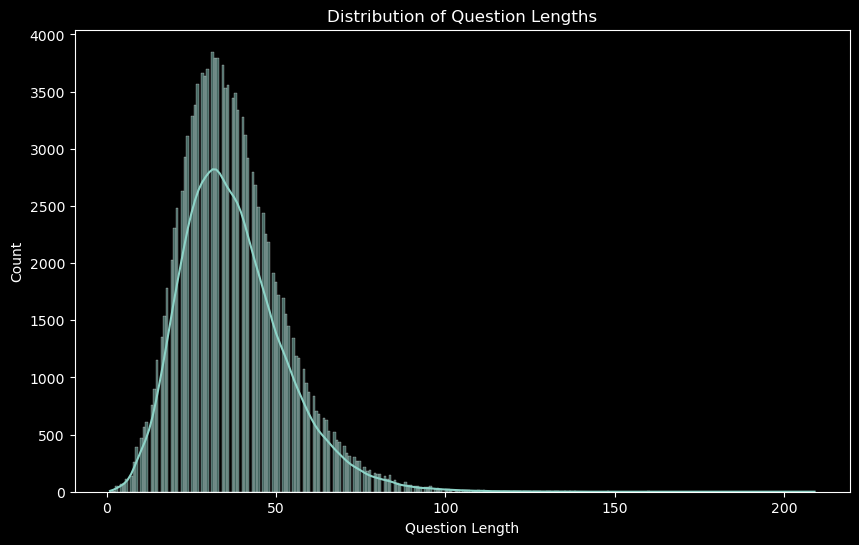

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

df['question_length'] = df['question'].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(df['question_length'], kde=True)
plt.title('Distribution of Question Lengths')
plt.xlabel('Question Length')
plt.ylabel('Count')
plt.show()

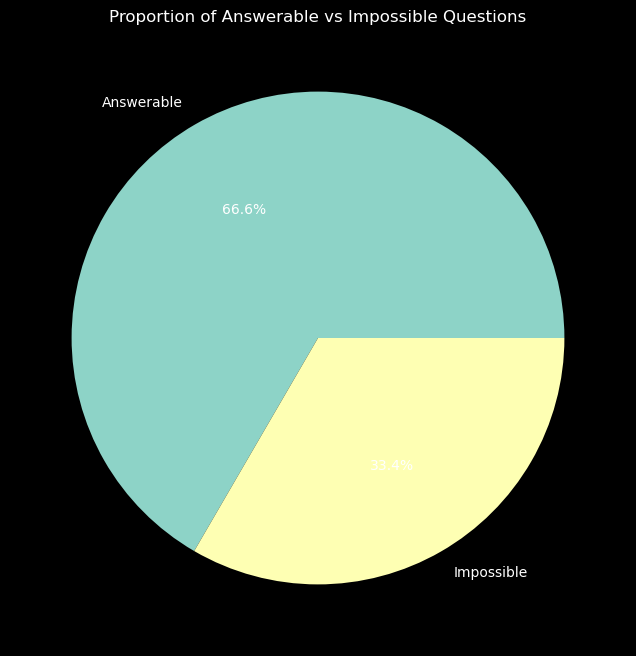

In [30]:
answerable = df['is_impossible'].value_counts(normalize=True)
plt.figure(figsize=(8, 8))
plt.pie(answerable, labels=['Answerable', 'Impossible'], autopct='%1.1f%%')
plt.title('Proportion of Answerable vs Impossible Questions')
plt.show()